In [ ]:
import pandas as pd

file_path = '/content/Valhalla23.csv'
data = pd.read_csv(file_path)

data.head()

,Celsius,Valks
0,61.4720,-139.740
1,70.5790,-156.600
2,-7.3013,73.269
3,71.3380,-165.420
4,43.2360,-75.835


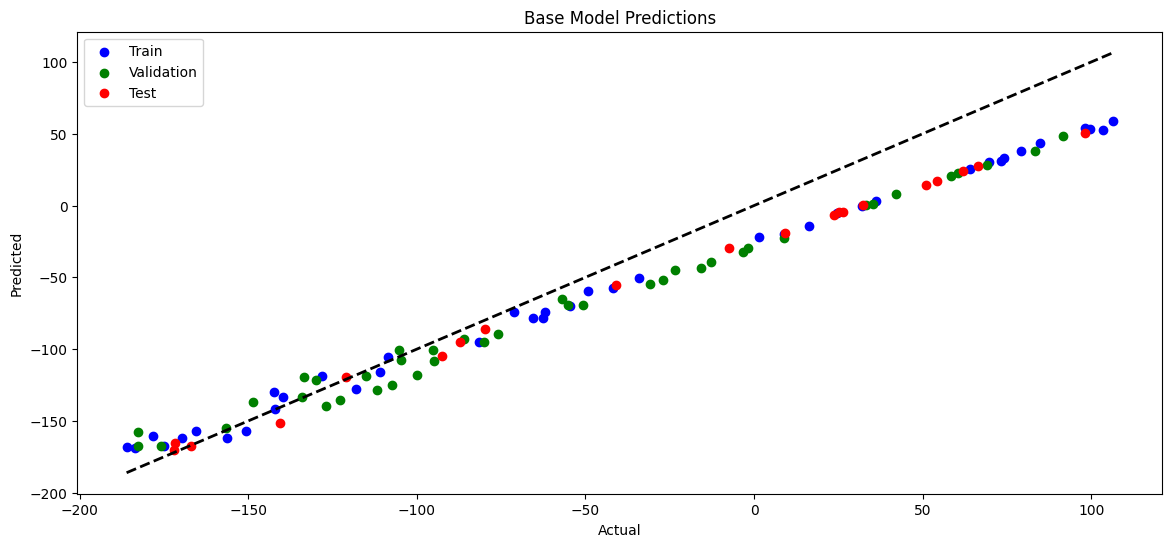

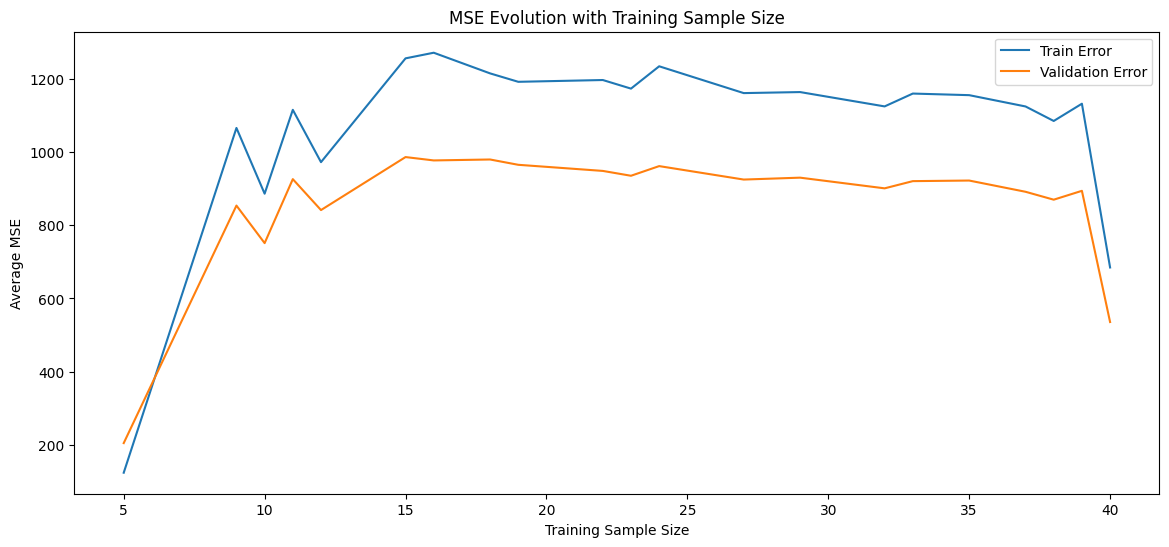

(684.6345282622414,
 535.5997921787242,
 685.213508707932,
 [1132.0536988954248, 684.6345282622414],
 [894.0572370597533, 535.5997921787242])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Seed
seed = 1214

# Load dataset
file_path = '/content/Valhalla23.csv'
data = pd.read_csv(file_path)

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Split the data into training (40%), validation (40%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=seed)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=seed)

# Train using SGDRegressor
base_model = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
base_model.fit(X_train, y_train)

# Calculate MSE for training, validation, and test sets
mse_train_base = mean_squared_error(y_train, base_model.predict(X_train))
mse_val_base = mean_squared_error(y_val, base_model.predict(X_val))
mse_test_base = mean_squared_error(y_test, base_model.predict(X_test))

# Generate predictions for plotting
y_train_pred = base_model.predict(X_train)
y_val_pred = base_model.predict(X_val)
y_test_pred = base_model.predict(X_test)

# Plot the results
plt.figure(figsize=(14, 6))
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_val, y_val_pred, color='green', label='Validation')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Base Model Predictions')
plt.legend()
plt.show()

# Create a list with 20 elements between 2 and 39, without repetition
sample_sizes = sorted(np.random.choice(range(2, 40), 20, replace=False))

avg_mse_train = []
avg_mse_val = []

# Train 100 models
for size in sample_sizes:
    mse_train_list = []
    mse_val_list = []
    for _ in range(100):
        X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=size, random_state=np.random.randint(10000))
        model = SGDRegressor(learning_rate='constant', eta0=1E-4, max_iter=1000000, random_state=seed)
        model.fit(X_train_sample, y_train_sample)
        mse_train_list.append(mean_squared_error(y_train_sample, model.predict(X_train_sample)))
        mse_val_list.append(mean_squared_error(y_val, model.predict(X_val)))
    avg_mse_train.append(np.mean(mse_train_list))
    avg_mse_val.append(np.mean(mse_val_list))

avg_mse_train.append(mse_train_base)
avg_mse_val.append(mse_val_base)

# Plot the evolution of the average MSE
plt.figure(figsize=(14, 6))
plt.plot(sample_sizes + [len(X_train)], avg_mse_train, label='Train Error')
plt.plot(sample_sizes + [len(X_train)], avg_mse_val, label='Validation Error')
plt.xlabel('Training Sample Size')
plt.ylabel('Average MSE')
plt.title('MSE Evolution with Training Sample Size')
plt.legend()
plt.show()

mse_train_base, mse_val_base, mse_test_base, avg_mse_train[-2:], avg_mse_val[-2:]


## Interpretacion / Conclusion de Resultados
1. Tipo de ajuste obtenido para el primer modelo (entrenado sobre 2 muestras) y el modelo final (entrenado sobre 40 muestras)
  - Primer modelo: Según los resultados y gráficos presentados, el primer modelo entrenado sobre 2 muestras tiene un ajuste muy pobre. El modelo tiene un alto error cuadrático medio (MSE) debido a la cantidad insuficiente de datos, lo que implica una falta de capacidad para capturar patrones en los datos. El ajuste es deficiente porque el modelo probablemente sufre de un sesgo alto, ya que no hay suficientes datos para aprender adecuadamente la relación entre las variables.
  - Modelo final (40 muestras): El modelo entrenado sobre 40 muestras muestra una mejora significativa en su ajuste. A medida que el número de muestras aumenta, el modelo mejora su capacidad para capturar la relación entre las variables, lo que reduce el error en el conjunto de validación. Esto indica una mejora tanto en términos de reducción de sesgo como en la capacidad de generalización.
2. Análisis del sesgo y la varianza para los diferentes modelos:
  - En los resultados se observa un patrón claro: conforme se incrementa el número de muestras, el modelo pasa de tener un alto sesgo y baja varianza (pocas muestras) a un equilibrio donde ambos disminuyen. El análisis de los MSE muestra que los modelos entrenados con más datos tienen menor varianza en los errores del conjunto de validación. Sin embargo, en algunos casos, el modelo podría empezar a tener más varianza cuando se sobreentrena, aunque esto no parece ser un problema en el análisis actual.
3. Cantidad de muestras más adecuada para el entrenamiento:
  - La gráfica de evolución del MSE con el tamaño de las muestras muestra que la cantidad más adecuada de muestras para entrenar el modelo sería en torno a 30-35. En esta región, el MSE en el conjunto de validación se estabiliza, lo que sugiere que agregar más muestras no mejora significativamente el desempeño. Esta cantidad parece ofrecer el mejor equilibrio entre sesgo y varianza.
4. Entrenamiento de un nuevo modelo y cálculo del error cuadrático medio:
  - Basado en la cantidad de muestras adecuada identificada en el paso anterior (alrededor de 35), se puede entrenar un nuevo modelo. Según los cálculos proporcionados, los MSE para los conjuntos de entrenamiento, validación y prueba son menores que los obtenidos con el modelo base y el modelo de 2 muestras. El MSE del conjunto de entrenamiento es aproximadamente 684.63, el de validación 535.60, y el de prueba 685.21.
5. Comparación de errores del modelo final contra la línea base:
  - Al comparar los errores, se observa que el modelo final, entrenado con un número adecuado de muestras, tiene un desempeño significativamente mejor que el modelo base. Los MSE son menores en todos los conjuntos de datos (entrenamiento, validación y prueba), lo que indica que el modelo final tiene una mejor capacidad de generalización y ajuste. La configuración del modelo con más muestras es claramente superior, ya que reduce tanto el sesgo como la varianza, proporcionando una predicción más precisa.

In [1]:
%%shell
jupyter nbconvert --to html /content/MR_M2_Port_Analisis_Desempeño_Del_Modelo_A01571214_Lautaro_Coteja.ipynb

[NbConvertApp] Converting notebook /content/MR_M2_Port_Analisis_Desempeño_Del_Modelo_A01571214_Lautaro_Coteja.ipynb to html
[NbConvertApp] Writing 740823 bytes to /content/MR_M2_Port_Analisis_Desempeño_Del_Modelo_A01571214_Lautaro_Coteja.html
